# Bayesian Mini Project

Zeqiu.Yu

## 1. Introduction

In this mini project, I mainly use the result of juvenile delinquency among males v.s. birth order. The data includes the survey of 1137 boys. Which can be seen as follows:  

|  | OLDEST | IN-BETWEEN | YOUNGEST | ONLY CHILD | TOTAL |
| --- | --- | --- | --- | --- | --- |
| MOST DELINQUENT | 127(26.9%) | 123(37.0%) | 93(37.1%) | 17(20.7%) | 360(31.7%) |
| LEAST DELINQUENT | 345(73.1%) | 209(63.0%) | 158(62.9%) | 65(79.3%) | 777(68.3%) |
| TOTAL | 472 | 332 | 251 | 82 | 1137 |


We want to find whether the juvenile delinquency is related to the birth order. For the 2x2 tables of binormial distributions, we can use Central Limit Theorem(CLT), Law of Large Numbers to approxiamte Normal distribution or use pooled estimate. However, for the situation that there are five classes: oldest, in-between, younger and only child, we may use another test procedure, $\textit{Pearson chi-square test statistic}$.  
$\textit{Pearson chi-square test statistic}$ is similar to the pooled estimate. Under the null hypothesis $H_0$: there is no relationship between juvenile delinquency and birth order, which means $p_i = p_{i1} = p_{i2}$, and the Pearson chi-square statistic is defined as: $X^2 = \sum_{i=1}^2\sum_{j = 1}^2 \frac{(\ n_{ij}\ -\  \hat{m_{0ij}}\ )^2}{\hat{m_{0ij}}}$ and $\hat{m_{0ij}} = \frac{n_{i*}n_{*j}}{n_{**}}$. $\hat{m_{0ij}}$ is the expected values of $m_ij$ under the null hypothesis. Under this circumstance, if the null hypothesis is true, the numerator of $X^2$ should be small as the error term. We can also analyze it using log odd ratio.  

In this problem, it is a sample of one population categorized by two factors, with 2 and 4 categories respectively. As it is required to fix the row sum. Then it is a multinomial distribution. For a multinomial, we tend to use a Dirichlet distribution as the prior: $p(x_1, x_2, x_3, x_4; \theta) = \frac{\Gamma (\sum_{i = 1}^4 \theta_i)}{\Pi_{i=1}^4\  \Gamma (\theta_i)}\ \Pi_{i=1}^4\ x_i^{\theta_i}$

## 2. Analysis

The table is of df = (I-1)(J-1) = 1x3 = 3, we will get 3 log odd ratio.  
For the observation $(\ n_{i1},\ n_{i2},\ n_{i3},\ n_{i4})$, we use the Dirichlet prior: $p_{i1}^{\theta_1}p_{i2}^{\theta_2}p_{i3}^{\theta_3}p_{i4}^{\theta_4}$ for i = 1 and i = 2.
Then we can get the log odd ratios: $log\ \frac{p_{11}\ p_{22}}{p_{12}\ p_{21}}$, $log\ \frac{p_{11}\ p_{23}}{p_{13}\ p_{21}}$, $log\ \frac{p_{11}\ p_{24}}{p_{14}\ p_{21}}$. We apply Haldane and Bayes priors to these two catagories:

### 2.1 Haldane and Bayes priors

Haldane:  
Most Delinquent: $P_{prior}$(p ; $\Theta_1$) ~ Dirichlet(0, 0, 0, 0)  
Least Delinquent: $P_{prior}$(p ; $\Theta_2$) ~ Dirichlet(0, 0, 0, 0)  
Because these two catagories has the similar distribution form, their likelihood functions are all proportional to the form: $p_{i1}^{n_{i1}}p_{i2}^{n_{i2}}p_{i3}^{n_{i3}}p_{i4}^{n_{i4}}$.  
Then the posterior is $P_{posterior}$(p ; $\Theta_1$) ~ Dirichlet$(\ n_{i1},\ n_{i2},\ n_{i3},\ n_{i4})$


Bayes:  
Most Delinquent: $P_{prior}$(p ; $\Theta_1$) ~ Dirichlet(1, 1, 1, 1)  
Least Delinquent: $P_{prior}$(p ; $\Theta_2$) ~ Dirichlet(1, 1, 1, 1)  
Because these two catagories has the similar distribution form, their likelihood functions are all proportional to the form: $p_{i1}^{n_{i1}}p_{i2}^{n_{i2}}p_{i3}^{n_{i3}}p_{i4}^{n_{i4}}$.  
Then the posterior is $P_{posterior}$(p ; $\Theta_1$) ~ Dirichlet$(\ n_{i1}+1,\ n_{i2}+1,\ n_{i3}+1,\ n_{i4}+1)$


From the anlysis above, and the formula to calculate the mean and the standard deviation we can get following results:
Haldane (The calculation process can be seen in the appendix):

|  | MEAN | SDE | 100000 | 1000000 | 10000000 |
| --- | --- | --- | --- | --- | --- |
| $log(\frac{p_{11}\ p_{22}}{p_{12}\ p_{21}}$) | -0.46921 | 0.15391 | [-0.77126, -0.16696] | [-0.77238, -0.16859] | [-0.77240, -0.16817] |
| $log(\frac{p_{11}\ p_{23}}{p_{13}\ p_{21}}$) | -0.46936 | 0.16690 | [-0.79541, -0.14297] | [-0.79632, -0.14134] | [-0.79695, -0.14166] |
| $log(\frac{p_{11}\ p_{24}}{p_{14}\ p_{21}}$) | 0.34182  | 0.29151 | [-0.19917, 0.96121] | [-0.19876, 0.95716] | [-0.19867, 0.95786] |

Bayes:

|  | MEAN | SDE | 100000 | 1000000 | 10000000 |
| --- | --- | --- | --- | --- | --- |
| $log(\frac{p_{11}\ p_{22}}{p_{12}\ p_{21}}$) | -0.46758 | 0.15391 | [-0.76793, -0.16748] | [-0.76905, -0.16717] | [-0.76976, -0.16737] |
| $log(\frac{p_{11}\ p_{23}}{p_{13}\ p_{21}}$) | -0.46880 | 0.16690 | [-0.79698, -0.14149] | [-0.79495, -0.14223] | [-0.79514, -0.14228] |
| $log(\frac{p_{11}\ p_{24}}{p_{14}\ p_{21}}$) | 0.30487  | 0.29151 | [-0.22480, 0.90302] | [-0.22586, 0.90492] | [-0.22587, 0.90573] |

From the table above and simulation results, we can get the histogram of the simulation and approximate using Normal distribution with the mean and SDE provided above.

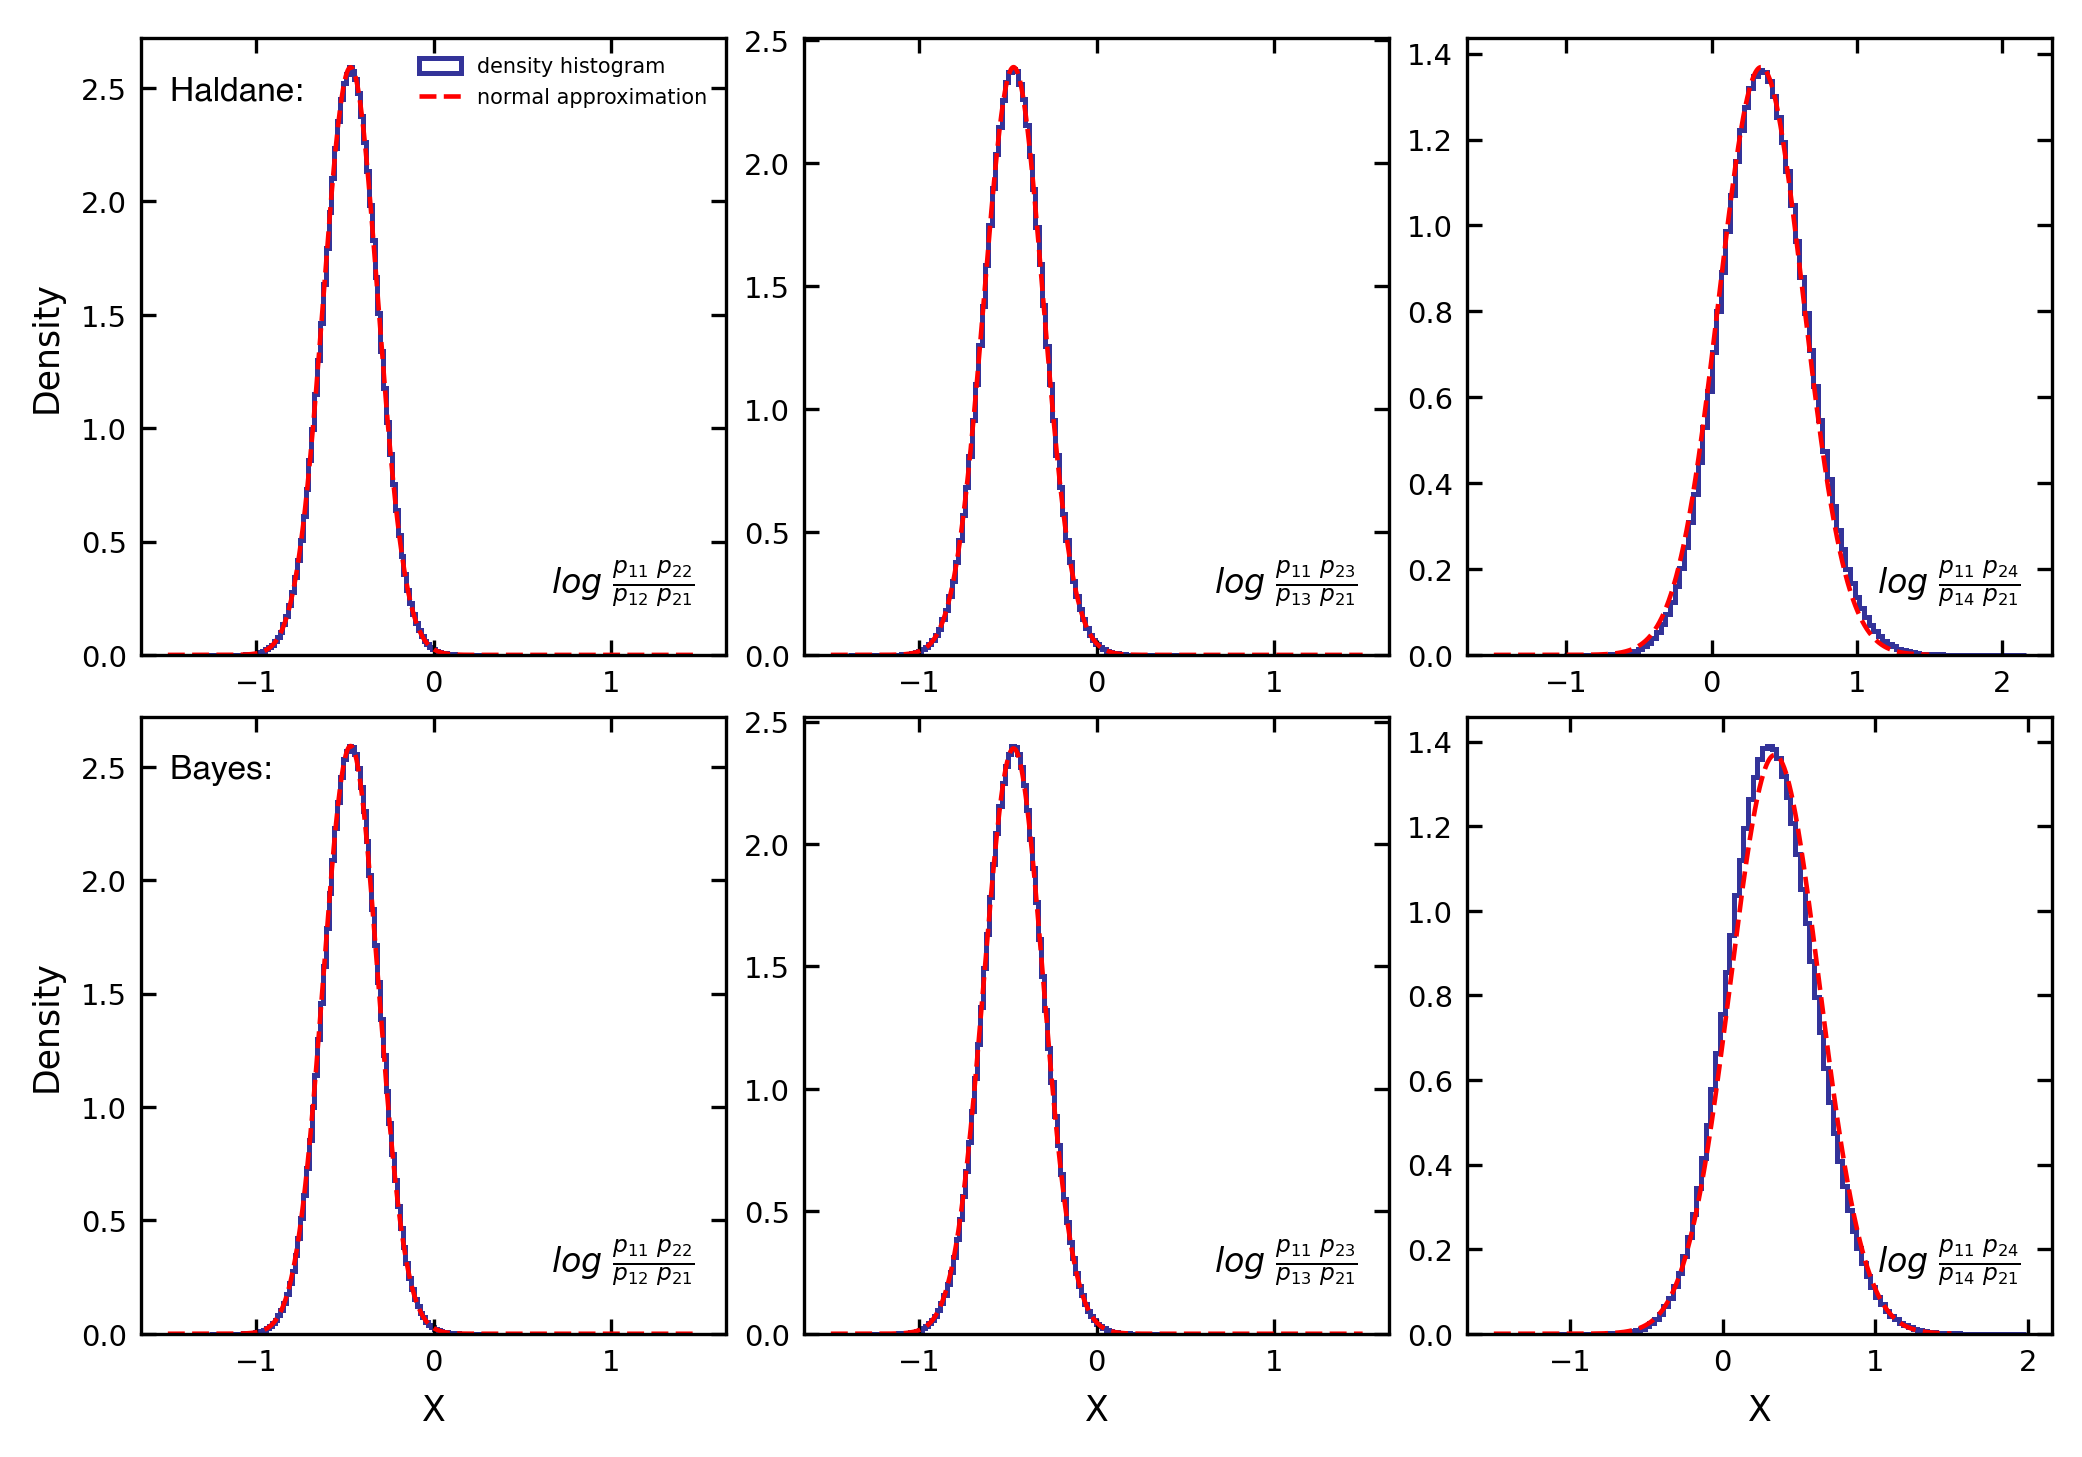

In [85]:
Image(filename="MiniProject.png")

## 3. Summary

From the analysis above, for the Hull Hypothesis $H_0: log\ \frac{p_{11}\ p_{22}}{p_{12}\ p_{21}}$ = $log\ \frac{p_{11}\ p_{23}}{p_{13}\ p_{21}}$ = $log\ \frac{p_{11}\ p_{24}}{p_{14}\ p_{21}}$ =0, we reject it, and give the conclusion that the juvenile delinquency and the birth order are related. In addition, we find that, no matter what kind of prior we choose, we will get the similar results. Furthermore, the density histogram can be approximate well using normal distribution, in this problem, Bayes method and the frequentist method reach a consensus.

## 4. Appendix

In [84]:
import pandas as pd
import numpy as np
from scipy.stats import dirichlet
from scipy.stats import norm
from IPython.display import Image

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
fig_dpi      = 300
fig_typeface = 'Helvetica'
fig_family   = 'monospace'
fig_style    = 'normal'

In [44]:
MostDelinquent = np.array([127, 123, 93, 17])
LeastDelinquent = np.array([345, 209, 158, 65])
log_odds_ratio = np.array([[[],[],[]],[[],[],[]],[[],[],[]]])

Priors = {"Haldane":np.array([0]*4), "Bayes": np.array([1]*4)}
NumPoints = [int(1e5), int(1e6), int(1e7)]
for key in Priors.keys():
    params = Priors[key]
    for num in NumPoints:
        MDSample = dirichlet.rvs(params + MostDelinquent, num)
        LDSample = dirichlet.rvs(params + LeastDelinquent, num)
        oddsRatio1 = np.log(MDSample[:,0]/MDSample[:, 1]) - np.log(LDSample[:, 0]/LDSample[:, 1] )
        oddsRatio2 = np.log(MDSample[:,0]/MDSample[:, 2]) - np.log(LDSample[:, 0]/LDSample[:, 2] )
        oddsRatio3 = np.log(MDSample[:,0]/MDSample[:, 3]) - np.log(LDSample[:, 0]/LDSample[:, 3] )
        exec("odds1%s%d = oddsRatio1"%(key[0], int(num)))
        exec("odds2%s%d = oddsRatio2"%(key[0], int(num)))
        exec("odds3%s%d = oddsRatio3"%(key[0], int(num)))

In [45]:
print("Haldane:")
for idx in [1, 2, 3]:
    for num in NumPoints:
        print("Num %d odds ratio, with %d points:"%(idx, num), end = "     ")
        exec("oddsRatio = odds%dH%d"%(idx, num))
        oddsRatio.sort()
        lb = np.percentile(oddsRatio, 2.5)
        ub = np.percentile(oddsRatio, 97.5)
        print("The HPD is: [%.5f, %.5f]"%(lb, ub))
        
print("Bayes:")
for idx in [1, 2, 3]:
    for num in NumPoints:
        print("Num %d odds ratio, with %d points:"%(idx, num), end = "     ")
        exec("oddsRatio = odds%dB%d"%(idx, num))
        oddsRatio.sort()
        lb = np.percentile(oddsRatio, 2.5)
        ub = np.percentile(oddsRatio, 97.5)
        print("The HPD is: [%.5f, %.5f]"%(lb, ub))

Haldane:
Num 1 odds ratio, with 100000 points:     The HPD is: [-0.77126, -0.16696]
Num 1 odds ratio, with 1000000 points:     The HPD is: [-0.77238, -0.16859]
Num 1 odds ratio, with 10000000 points:     The HPD is: [-0.77240, -0.16817]
Num 2 odds ratio, with 100000 points:     The HPD is: [-0.79541, -0.14297]
Num 2 odds ratio, with 1000000 points:     The HPD is: [-0.79632, -0.14134]
Num 2 odds ratio, with 10000000 points:     The HPD is: [-0.79695, -0.14166]
Num 3 odds ratio, with 100000 points:     The HPD is: [-0.19917, 0.96121]
Num 3 odds ratio, with 1000000 points:     The HPD is: [-0.19876, 0.95716]
Num 3 odds ratio, with 10000000 points:     The HPD is: [-0.19867, 0.95786]
Bayes:
Num 1 odds ratio, with 100000 points:     The HPD is: [-0.76793, -0.16748]
Num 1 odds ratio, with 1000000 points:     The HPD is: [-0.76905, -0.16717]
Num 1 odds ratio, with 10000000 points:     The HPD is: [-0.76976, -0.16737]
Num 2 odds ratio, with 100000 points:     The HPD is: [-0.79698, -0.14149]


In [69]:
Haldane = []

Bayes = []

for i in [0,1,2]:
    se1 = np.sqrt(1/MostDelinquent[0]+1/MostDelinquent[i+1]+1/LeastDelinquent[0]+1/LeastDelinquent[i+1])
    mean1 = np.log(MostDelinquent[0]*LeastDelinquent[i+1]/(MostDelinquent[i+1]*LeastDelinquent[0]))
    se2 = np.sqrt(1/MostDelinquent[0]+1/MostDelinquent[i+1]+1/LeastDelinquent[0]+1/LeastDelinquent[i+1])
    mean2 = np.log((MostDelinquent[0]+1)* (LeastDelinquent[i+1]+1)/((MostDelinquent[i+1]+1)*(LeastDelinquent[0]+1)))
    Haldane.append([mean1, se1])
    Bayes.append([mean2, se2])
    print("Haldane: [%.5f, %.5f]" %(mean1, se1), "| Bayes: [%.5f, %.5f]" %(mean2, se2))
    

Haldane: [-0.46921, 0.15391] | Bayes: [-0.46758, 0.15391]
Haldane: [-0.46936, 0.16690] | Bayes: [-0.46880, 0.16690]
Haldane: [0.34182, 0.29151] | Bayes: [0.30487, 0.29151]


In [73]:
Haldane[2]

[0.34181659526665253, 0.2915145129647052]

/var/folders/dy/y_4bw3nj3nl7cw3b482fcf_c0000gn/T/ipykernel_33907/2669537317.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs1[0])
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


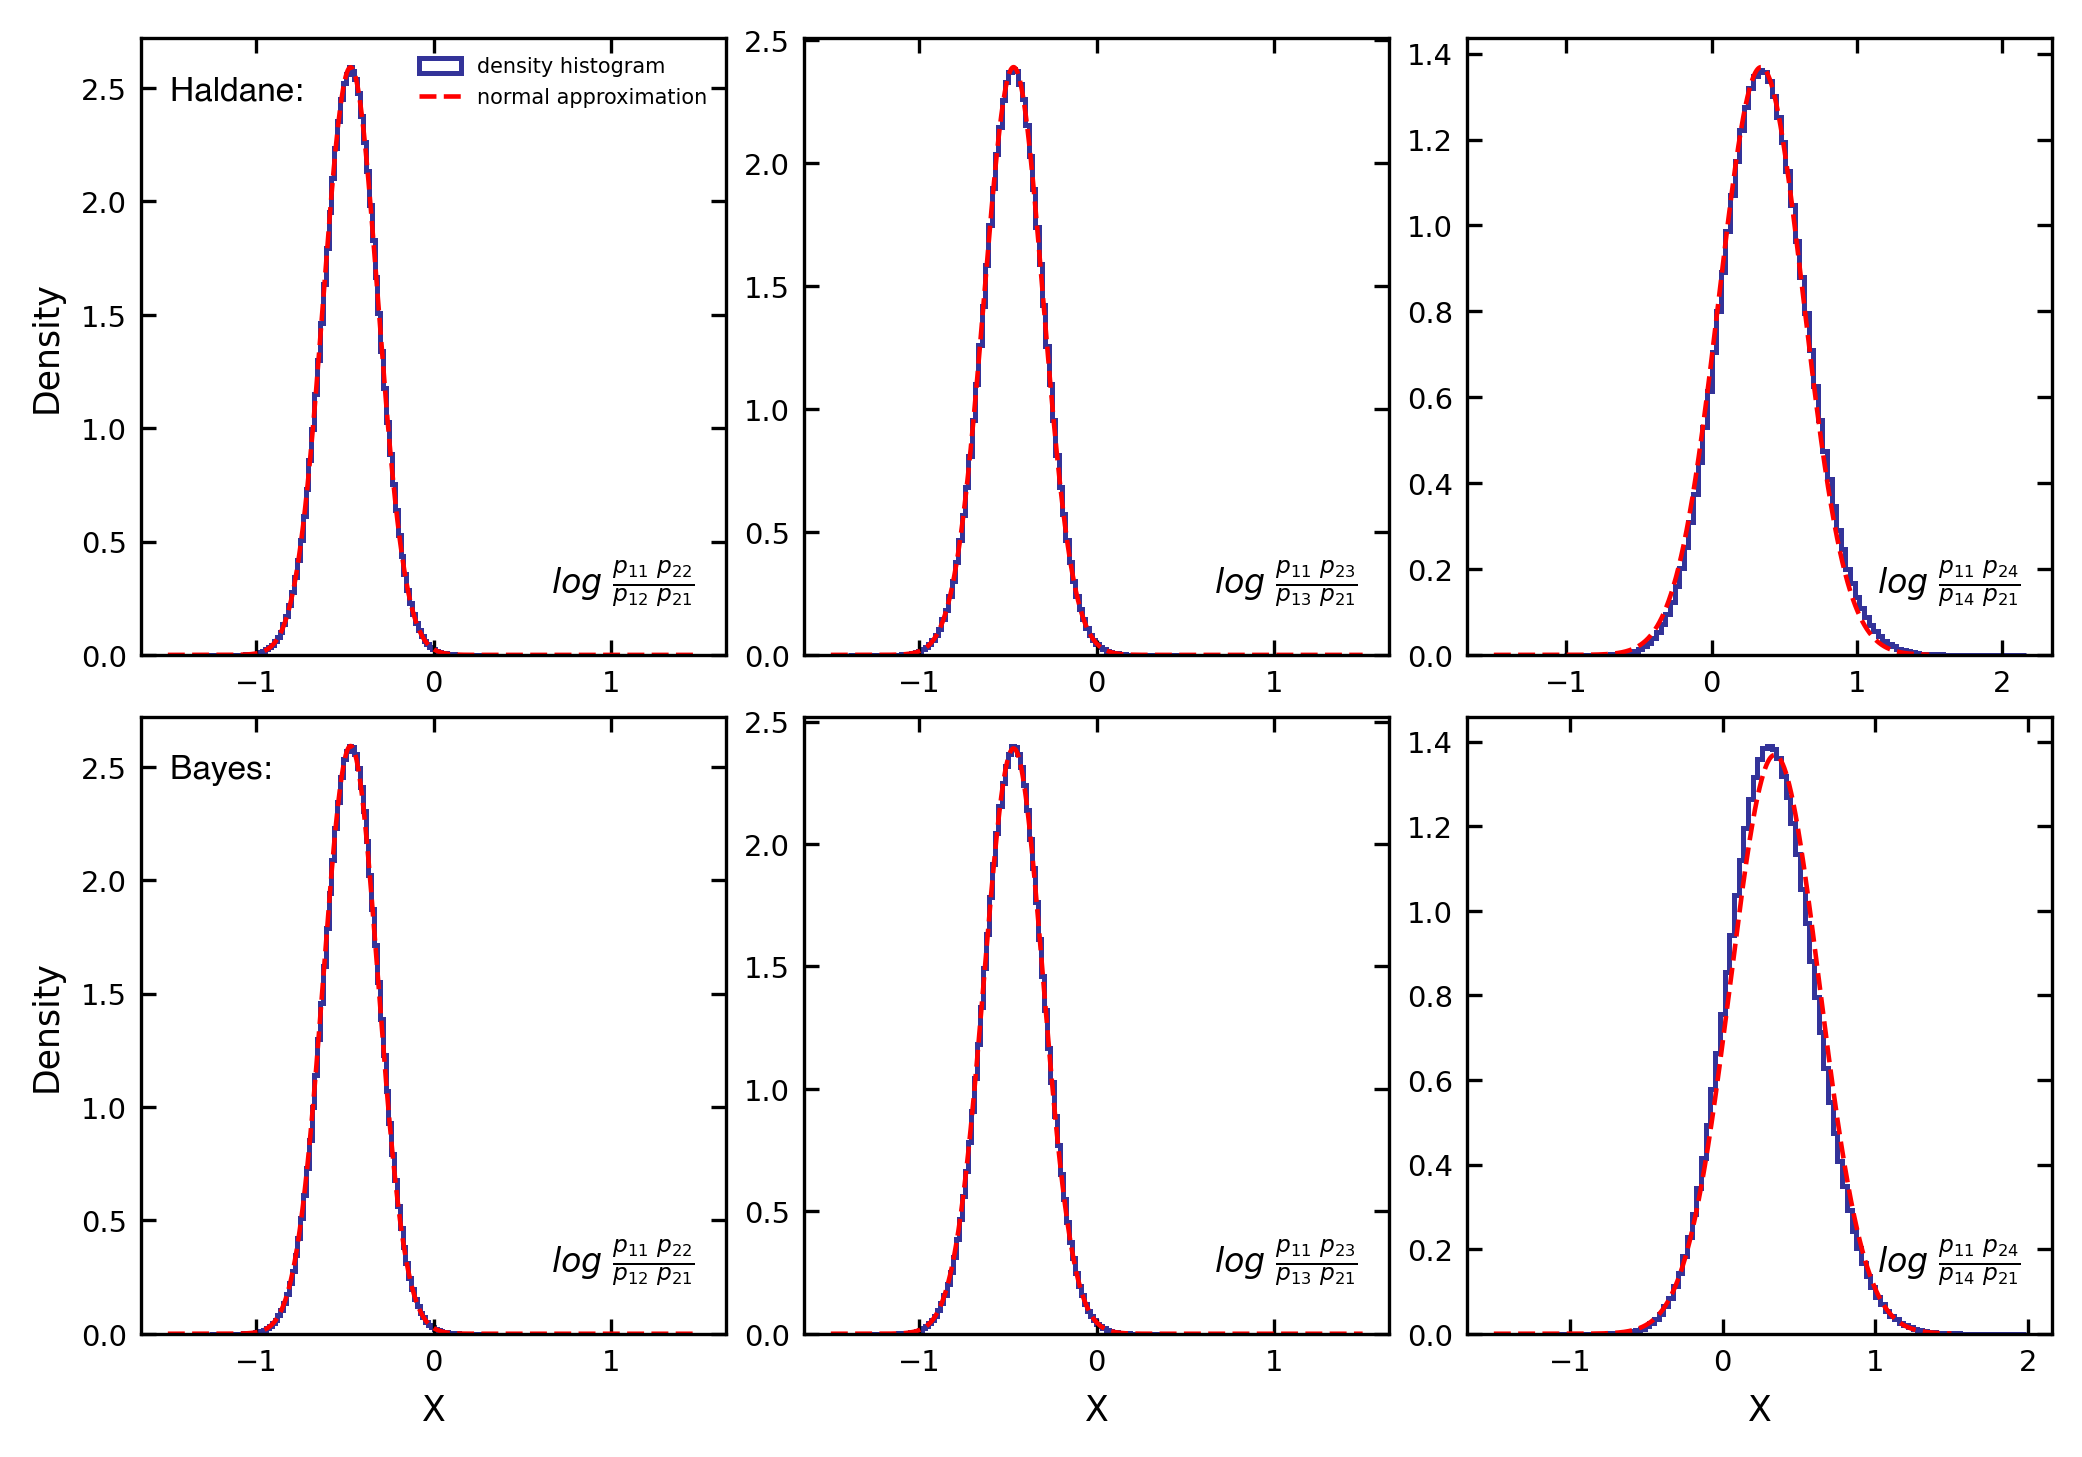

In [83]:
f,ax = plt.subplots(figsize=(6.5, 4.8), dpi=300)
gs1 = gridspec.GridSpec(2, 1)
gs1.update(left=0.01, right=0.31, bottom=0.05, top=0.95, hspace=0.1, wspace=0.)
ax1 = plt.subplot(gs1[0])
ax4 = plt.subplot(gs1[1])


gs2 = gridspec.GridSpec(2, 1)
gs2.update(left=0.35, right=0.65, bottom=0.05, top=0.95, hspace=0.1, wspace=0.)
ax2 = plt.subplot(gs2[0])
ax5= plt.subplot(gs2[1])


gs3 = gridspec.GridSpec(2, 1)
gs3.update(left=0.69, right=0.99, bottom=0.05, top=0.95, hspace=0.1, wspace=0.)
ax3 = plt.subplot(gs3[0])
ax6 = plt.subplot(gs3[1])

x = np.linspace(-1.5, 1.5, 100000)


ax1.text(0.05, 0.9, "Haldane: ", size=8, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax1.transAxes)
ax4.text(0.05, 0.9, "Bayes: ", size=8, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax4.transAxes)

ax1.hist(odds1H10000000, bins = 100, density = True, histtype='step',lw= 1.2,color='navy', alpha=0.8, zorder = 1,  label='density histogram')
ax1.text(0.7, 0.1, r"$log\ \frac{p_{11}\ p_{22}}{p_{12}\ p_{21}}$", size=8, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax1.transAxes)
ax1.plot(x, norm.pdf(x,loc = Haldane[0][0], scale = Haldane[0][1]), "r--", linewidth=1.1, label='normal approximation')

ax2.hist(odds2H10000000, bins = 100, density = True, histtype='step',lw= 1.2,color='navy', alpha=0.8, zorder = 1)
ax2.text(0.7, 0.1, r"$log\ \frac{p_{11}\ p_{23}}{p_{13}\ p_{21}}$", size=8, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax2.transAxes)
ax2.plot(x, norm.pdf(x,loc = Haldane[1][0], scale = Haldane[1][1]), "r--", linewidth=1.1)

ax3.hist(odds3H10000000, bins = 100, density = True, histtype='step',lw= 1.2,color='navy', alpha=0.8, zorder = 1)
ax3.text(0.7, 0.1, r"$log\ \frac{p_{11}\ p_{24}}{p_{14}\ p_{21}}$", size=8, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax3.transAxes)
ax3.plot(x, norm.pdf(x, loc = Haldane[2][0], scale = Haldane[2][1]), "r--", linewidth=1.1)

ax4.hist(odds1B10000000, bins = 100, density = True, histtype='step',lw= 1.2,color='navy', alpha=0.8, zorder = 1)
ax4.text(0.7, 0.1, r"$log\ \frac{p_{11}\ p_{22}}{p_{12}\ p_{21}}$", size=8, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax4.transAxes)
ax4.plot(x, norm.pdf(x,loc = Haldane[0][0], scale = Haldane[0][1]), "r--", linewidth=1.1)

ax5.hist(odds2B10000000, bins = 100, density = True, histtype='step',lw= 1.2,color='navy', alpha=0.8, zorder = 1)
ax5.text(0.7, 0.1, r"$log\ \frac{p_{11}\ p_{23}}{p_{13}\ p_{21}}$", size=8, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax5.transAxes)
ax5.plot(x, norm.pdf(x,loc = Haldane[1][0], scale = Haldane[1][1]), "r--", linewidth=1.1)

ax6.hist(odds3B10000000, bins = 100, density = True, histtype='step',lw= 1.2,color='navy', alpha=0.8, zorder = 1)
ax6.text(0.7, 0.1, r"$log\ \frac{p_{11}\ p_{24}}{p_{14}\ p_{21}}$", size=8, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax6.transAxes)
ax6.plot(x, norm.pdf(x, loc = Haldane[2][0], scale = Haldane[2][1]), "r--", linewidth=1.1)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.tick_params(axis='both', which='both',labelleft = True, labelsize='x-small', right=True, top=True, direction='in')
ax1.legend(loc = 1 ,fontsize = 5,markerscale = 1,ncol = 1,scatterpoints= 1,frameon = True,framealpha =0.).get_frame().set_linewidth(0.0)
ax4.set_xlabel('X', size='small'); ax5.set_xlabel('X', size='small');  ax6.set_xlabel('X', size='small')
ax1.set_ylabel('Density', size = "small"); ax4.set_ylabel('Density', size = "small")
# plt.savefig("./MiniProject.png", bbox_inches = "tight")
